<a href="https://colab.research.google.com/github/sachumonpsajeev-cyber/VitalDb-Cardiac-Arrest-Prediction-TAN/blob/main/VitalDB_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Import Library

In [ ]:
# Install VitalDB library with compatible pandas
!pip install vitaldb pandas==2.2.2 -q

# Import libraries
import vitaldb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 12.1 MB/s eta 0:00:00
✅ All libraries imported successfully!


# Load Case Information

In [ ]:
# Load all case clinical information
cases = pd.read_csv('https://api.vitaldb.net/cases')

# Basic info
print(f"Total cases: {len(cases)}")
print(f"Total columns: {len(cases.columns)}")
print("\nFirst 5 cases:")
cases.head()

Total cases: 6388
Total columns: 74

First 5 cases:


,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100


#Explore the Data


In [ ]:
# See all available columns
print("Available columns:")
print(cases.columns.tolist())

Available columns:
['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend', 'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age', 'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype', 'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn', 'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt', 'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc', 'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr', 'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2', 'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize', 'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl', 'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid', 'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn', 'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe', 'intraop_epi', 'intraop_ca']


#Find Mortality Case

In [ ]:
# Check mortality distribution
print("Mortality value counts:")
print(cases['death_inhosp'].value_counts())

# Separate survived vs died
survived = cases[cases['death_inhosp'] == 0]
died = cases[cases['death_inhosp'] == 1]

print(f"\nTotal survived: {len(survived)}")
print(f"Total died: {len(died)}")
print(f"Mortality rate: {len(died)/len(cases)*100:.2f}%")

Mortality value counts:
death_inhosp
0    6331
1      57
Name: count, dtype: int64

Total survived: 6331
Total died: 57
Mortality rate: 0.89%


#cardiac arrest proxy

In [3]:
import pandas as pd
cases = pd.read_csv('https://api.vitaldb.net/cases')

# Cardiac arrest proxy: intraoperative epinephrine use
# (epinephrine is given during cardiac arrest resuscitation)

ca_cases = cases[cases['intraop_epi'] > 0]
non_ca_cases = cases[cases['intraop_epi'] == 0]

print(f"Cardiac arrest proxy cases (intraop epi > 0): {len(ca_cases)}")
print(f"Non-cardiac arrest cases: {len(non_ca_cases)}")
print(f"CA rate: {len(ca_cases)/len(cases)*100:.2f}%")

# Also check combined with death
ca_and_died = cases[(cases['intraop_epi'] > 0) & (cases['death_inhosp'] == 1)]
print(f"\nCA proxy + in-hospital death: {len(ca_and_died)}")
print(f"\nEpinephrine dose stats:")
print(cases[cases['intraop_epi'] > 0]['intraop_epi'].describe())

Cardiac arrest proxy cases (intraop epi > 0): 89
Non-cardiac arrest cases: 6299
CA rate: 1.39%

CA proxy + in-hospital death: 7

Epinephrine dose stats:
count       89.000000
mean       566.640449
std       3958.862771
min          1.000000
25%         20.000000
50%         60.000000
75%        120.000000
max      37220.000000
Name: intraop_epi, dtype: float64


#Epinephrine Outlier Investigation


In [4]:
# Investigate epinephrine outliers
print("Cases with epi > 1000 mcg (likely outliers):")
outliers = cases[cases['intraop_epi'] > 1000]
print(outliers[['caseid', 'intraop_epi', 'death_inhosp']].to_string())

# Define cleaned CA label (epi > 0 AND epi < 1000 mcg threshold)
cases['cardiac_arrest_label'] = ((cases['intraop_epi'] > 0) & (cases['intraop_epi'] <= 1000)).astype(int)

print(f"\nCleaned CA cases: {cases['cardiac_arrest_label'].sum()}")
print(f"Cleaned CA rate: {cases['cardiac_arrest_label'].mean()*100:.2f}%")

Cases with epi > 1000 mcg (likely outliers):
      caseid  intraop_epi  death_inhosp
1651    1652         1175             0
4682    4683        37220             1
5953    5954         4400             0

Cleaned CA cases: 86
Cleaned CA rate: 1.35%


#Visualize Class Distribution

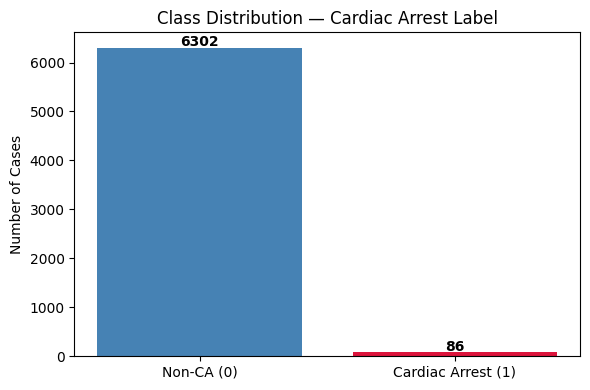

Class ratio (negative:positive) = 73:1


In [5]:
import matplotlib.pyplot as plt

# Plot class distribution
labels = ['Non-CA (0)', 'Cardiac Arrest (1)']
counts = [cases['cardiac_arrest_label'].value_counts()[0],
          cases['cardiac_arrest_label'].value_counts()[1]]

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['steelblue', 'crimson'])
plt.title('Class Distribution — Cardiac Arrest Label')
plt.ylabel('Number of Cases')
for i, v in enumerate(counts):
    plt.text(i, v + 30, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

print(f"Class ratio (negative:positive) = {counts[0]//counts[1]}:1")

#Load  Vital Signs For One Patient

In [ ]:
# Load vital signs for first patient
# HR = Heart Rate
# ART_MBP = Mean Blood Pressure
# SpO2 = Oxygen Saturation

data = vitaldb.load_case(
    1,  # caseid
    ['Solar8000/HR',
     'Solar8000/ART_MBP',
     'Solar8000/SpO2'],
    interval=1
)

print("Shape of data:", data.shape)
print("\nFirst few rows:")
print(data[:5])

Shape of data: (10941, 3)

First few rows:
[[nan nan nan]
 [88. -8. nan]
 [nan nan nan]
 [87. -8. nan]
 [nan nan nan]]


#Visualize Vital Signs

Total data points: 10941
Non-empty rows: 5463

Basic statistics:
                HR          MBP  SpO2
count  5455.000000  5449.000000   0.0
mean     77.192667    81.859607   NaN
std      14.609980    42.272479   NaN
min      57.000000   -70.000000   NaN
25%      68.000000    66.000000   NaN
50%      74.000000    80.000000   NaN
75%      82.000000    93.000000   NaN
max     139.000000   346.000000   NaN


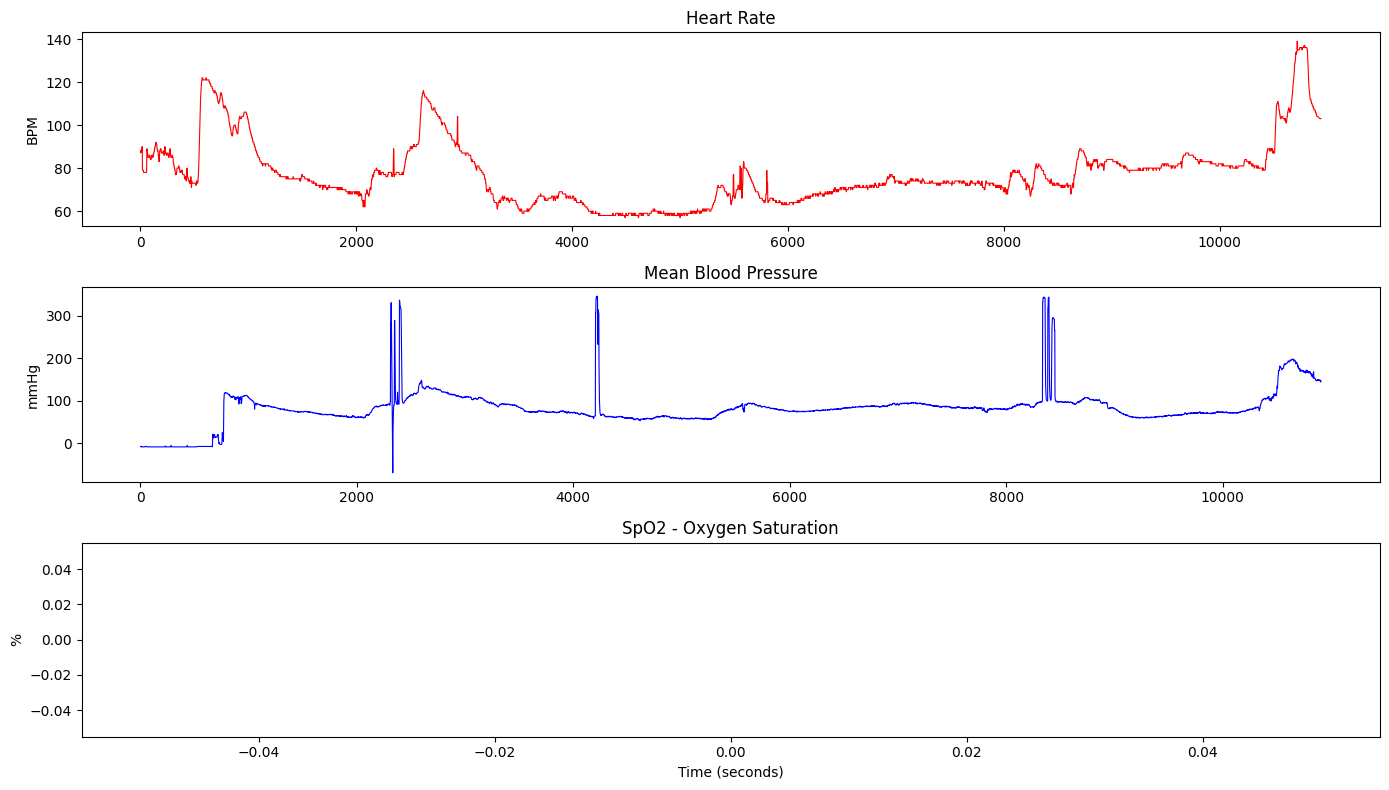

                 HR  MBP          SpO2
count  10464.000000  0.0  10250.000000
mean      85.745126  NaN     99.824488
std        4.579616  NaN      1.121171
min       73.000000  NaN     79.000000
25%       83.000000  NaN    100.000000
50%       85.000000  NaN    100.000000
75%       88.000000  NaN    100.000000
max      107.000000  NaN    100.000000


In [ ]:
# Convert to pandas for better handling
df = pd.DataFrame(data, columns=['HR', 'MBP', 'SpO2'])

# Drop rows where ALL values are missing
df_clean = df.dropna(how='all')

print(f"Total data points: {len(df)}")
print(f"Non-empty rows: {len(df_clean)}")
print(f"\nBasic statistics:")
print(df_clean.describe())

# Plot only non-null data
fig, axes = plt.subplots(3, 1, figsize=(14, 8))

axes[0].plot(df['HR'].dropna(), color='red', linewidth=0.8)
axes[0].set_title('Heart Rate')
axes[0].set_ylabel('BPM')

axes[1].plot(df['MBP'].dropna(), color='blue', linewidth=0.8)
axes[1].set_title('Mean Blood Pressure')
axes[1].set_ylabel('mmHg')

axes[2].plot(df['SpO2'].dropna(), color='green', linewidth=0.8)
axes[2].set_title('SpO2 - Oxygen Saturation')
axes[2].set_ylabel('%')

plt.xlabel('Time (seconds)')
plt.tight_layout()
plt.show()
# Try different SpO2 track names
data2 = vitaldb.load_case(
    5,  # try a different patient
    ['Solar8000/HR',
     'Solar8000/ART_MBP',
     'Solar8000/PLETH_SPO2'],  # different SpO2 name
    interval=1
)

df2 = pd.DataFrame(data2, columns=['HR', 'MBP', 'SpO2'])
print(df2.describe())

#Load Track List

In [ ]:
# See all available vital sign tracks
tracks = pd.read_csv('https://api.vitaldb.net/trks')

print(f"Total tracks available: {len(tracks)}")
print("\nSample tracks:")
tracks.head(10)

Total tracks available: 486449

Sample tracks:


,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0
5,1,BIS/SQI,087670cd3f03109ff5028f268587a9801865afca
6,1,BIS/SR,5154b6395a8636ea82d0e2648f2957227f0ad816
7,1,BIS/TOTPOW,11785e179322dd451895c9d97f8b3c40720416b4
8,1,Primus/AWP,37cdb593a215fe148d994485a93c77d8cc6a6008
9,1,Primus/CO2,c39466fa9b7f231e1f26cdccb8ccf8fbde782459


# Vital Signs Coverage Check



In [8]:
import pandas as pd
tracks = pd.read_csv('https://api.vitaldb.net/trks')

# Check vital sign coverage across all cases
tracks_of_interest = [
    'Solar8000/HR',
    'Solar8000/ART_MBP',
    'Solar8000/ART_SBP',
    'Solar8000/ART_DBP',
    'Solar8000/PLETH_SPO2',
    'Solar8000/RR',
    'Solar8000/BT',        # Body Temperature
    'Solar8000/ETCO2',     # End-tidal CO2
]

print("Vital Sign Coverage Across All Cases:\n")
for track in tracks_of_interest:
    count = tracks[tracks['tname'] == track]['caseid'].nunique()
    pct = count / len(cases) * 100
    print(f"{track:<35} {count:>5} cases ({pct:.1f}%)")

Vital Sign Coverage Across All Cases:

Solar8000/HR                         6387 cases (100.0%)
Solar8000/ART_MBP                    3724 cases (58.3%)
Solar8000/ART_SBP                    3725 cases (58.3%)
Solar8000/ART_DBP                    3725 cases (58.3%)
Solar8000/PLETH_SPO2                 6386 cases (100.0%)
Solar8000/RR                         1294 cases (20.3%)
Solar8000/BT                         5917 cases (92.6%)
Solar8000/ETCO2                      6242 cases (97.7%)


#Load Vitals for CA Cases

In [11]:
!pip install vitaldb -q
import vitaldb

# Load vital signs for all cardiac arrest cases
ca_caseids = cases[cases['cardiac_arrest_label'] == 1]['caseid'].tolist()
print(f"Loading vitals for {len(ca_caseids)} CA cases...\n")

selected_tracks = [
    'Solar8000/HR',
    'Solar8000/PLETH_SPO2',
    'Solar8000/ETCO2',
    'Solar8000/BT',
    'Solar8000/ART_MBP',
    'Solar8000/ART_SBP',
    'Solar8000/ART_DBP'
]

ca_vitals = {}
for cid in ca_caseids[:10]:  # test with first 10 first
    df = vitaldb.load_case(cid, selected_tracks, 1/100)
    ca_vitals[cid] = df
    print(f"caseid {cid}: {df.shape}")

print("\n✅ Sample load complete!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 114.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 3.0.1 which is incompatible.
db-dtypes 1.5.0 requires pandas<3.0.0,>=1.5.3, but you have pandas 3.0.1 which is incompatible.
dask-cudf-cu12 25.10.0 requires pandas<2.4.0dev0,>=2.0, but you have pandas 3.0.1 which is incompatible.
bqplot 0.12.45 requires pandas<3.0.0,>=1.0.0, but you have pandas 3.0.1 which is incompatible.
gradio 5.50.0 requires pandas<3.0,>=1.0, but you have pandas 3.0.1 which is incompatible.
cudf-cu12 25.10.0 requires p

#Check Data Quality of One CA Case

In [17]:
# Load with all 7 columns first, then drop BT
sample_1hz = pd.DataFrame(ca_vitals[87], columns=[
    'HR', 'PLETH_SPO2', 'ETCO2', 'BT', 'ART_MBP', 'ART_SBP', 'ART_DBP'
])

# Drop BT (100% missing)
sample_1hz = sample_1hz.drop(columns=['BT'])

# Downsample to 1Hz
sample_1hz = sample_1hz.iloc[::100].reset_index(drop=True)

# Fill missing values
sample_1hz = sample_1hz.ffill().bfill()

print("Shape:", sample_1hz.shape)
print("\nMissing % after fill:")
print((sample_1hz.isnull().sum() / len(sample_1hz) * 100).round(2))
print("\nBasic stats:")
print(sample_1hz.describe().round(2))

Shape: (10842, 6)

Missing % after fill:
HR            0.0
PLETH_SPO2    0.0
ETCO2         0.0
ART_MBP       0.0
ART_SBP       0.0
ART_DBP       0.0
dtype: float64

Basic stats:
             HR  PLETH_SPO2     ETCO2   ART_MBP   ART_SBP   ART_DBP
count  10842.00    10842.00  10842.00  10842.00  10842.00  10842.00
mean     122.42       98.92     40.62     64.37     82.74     51.07
std        4.97        0.99      1.49     11.46     16.45      7.48
min      117.00       98.00     39.00     52.00     61.00     37.00
25%      117.00       98.00     39.00     52.00     65.00     43.00
50%      127.00       98.00     42.00     75.00     98.00     58.00
75%      127.00      100.00     42.00     75.00     98.00     58.00
max      127.00      100.00     42.00     77.00    105.00     62.00


#Visualize the CA Case Vitals

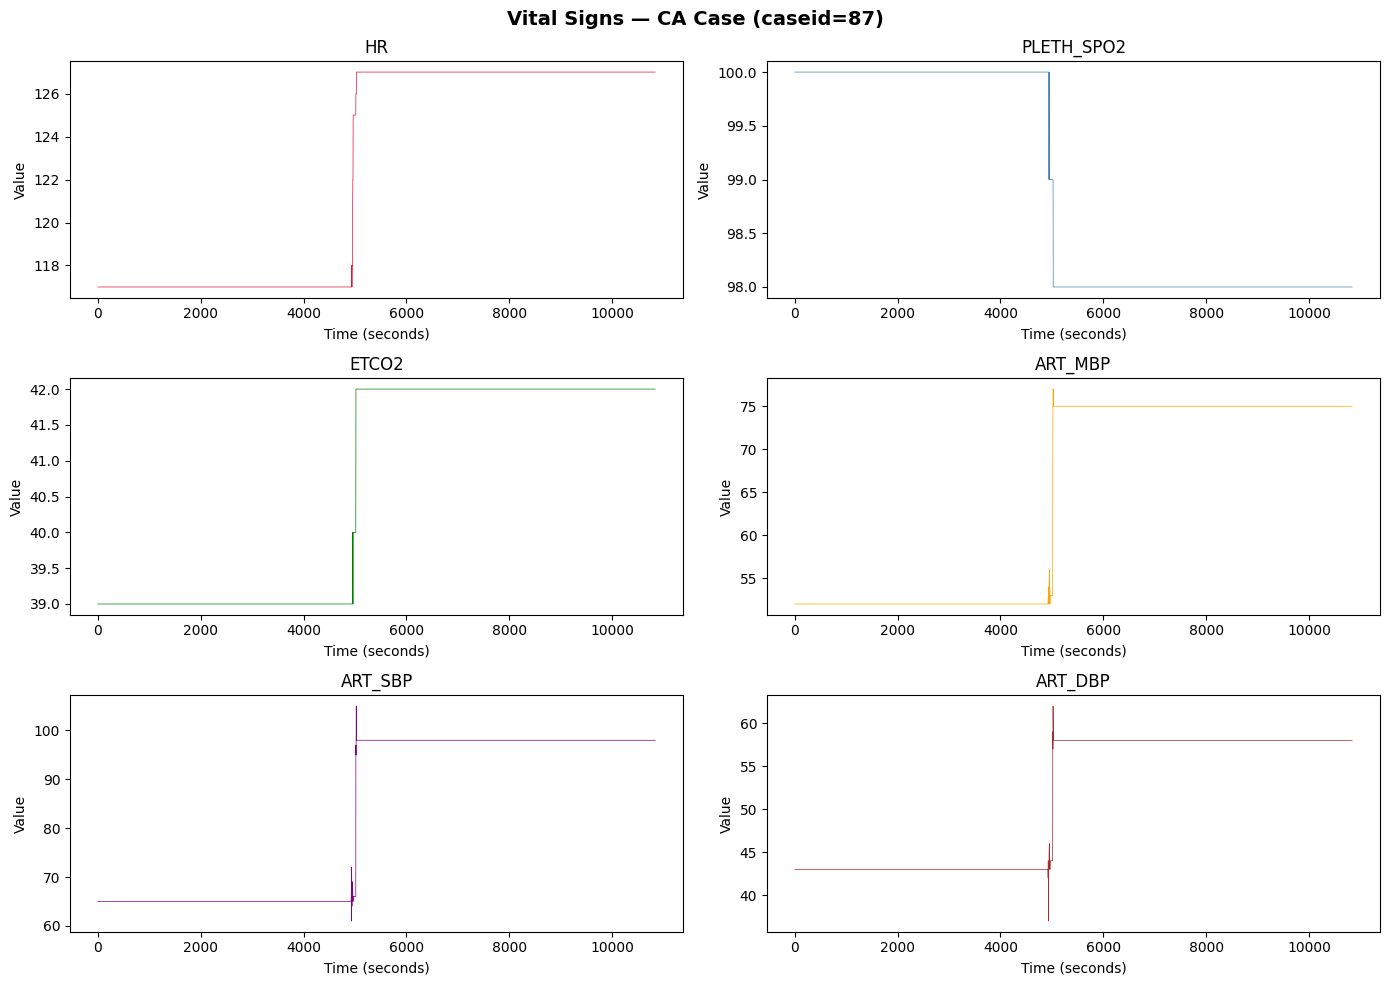

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle(f'Vital Signs — CA Case (caseid=87)', fontsize=14, fontweight='bold')

vitals = ['HR', 'PLETH_SPO2', 'ETCO2', 'ART_MBP', 'ART_SBP', 'ART_DBP']
colors = ['crimson', 'steelblue', 'green', 'orange', 'purple', 'brown']

for idx, (vital, color) in enumerate(zip(vitals, colors)):
    ax = axes[idx//2, idx%2]
    ax.plot(sample_1hz[vital], color=color, linewidth=0.5)
    ax.set_title(vital)
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('ca_case_vitals.png', dpi=150)
plt.show()

#Check How Much Real Data Exists

In [19]:
# Check actual non-NaN readings before filling
sample_raw = pd.DataFrame(ca_vitals[87], columns=[
    'HR', 'PLETH_SPO2', 'ETCO2', 'BT', 'ART_MBP', 'ART_SBP', 'ART_DBP'
]).drop(columns=['BT'])

sample_raw = sample_raw.iloc[::100].reset_index(drop=True)

# Find first and last real reading per column
for col in sample_raw.columns:
    real = sample_raw[col].dropna()
    if len(real) > 0:
        print(f"{col}: {len(real)} real readings | first at {real.index[0]}s | last at {real.index[-1]}s")
    else:
        print(f"{col}: NO real readings")

HR: 25 real readings | first at 4925s | last at 5027s
PLETH_SPO2: 23 real readings | first at 4925s | last at 5027s
ETCO2: 25 real readings | first at 4925s | last at 5027s
ART_MBP: 26 real readings | first at 4925s | last at 5027s
ART_SBP: 25 real readings | first at 4925s | last at 5027s
ART_DBP: 25 real readings | first at 4925s | last at 5027s


# Check real data duration for all 86 CA cases

In [3]:
import pandas as pd
import vitaldb

# Ensure 'cases' DataFrame and 'cardiac_arrest_label' are defined
# These steps are usually performed in previous cells (IWufOhZPees3, ig0y7shukdjB)
# but are included here for robustness against kernel resets or non-linear execution.
cases = pd.read_csv('https://api.vitaldb.net/cases')
cases['cardiac_arrest_label'] = ((cases['intraop_epi'] > 0) & (cases['intraop_epi'] <= 1000)).astype(int)

# Define ca_caseids (originally from xDMxncYLlsU6)
ca_caseids = cases[cases['cardiac_arrest_label'] == 1]['caseid'].tolist()

# Define selected_tracks (originally from xDMxncYLlsU6) - these are the tracks to LOAD
selected_tracks = [
    'Solar8000/HR',
    'Solar8000/PLETH_SPO2',
    'Solar8000/ETCO2',
    'Solar8000/BT',
    'Solar8000/ART_MBP',
    'Solar8000/ART_SBP',
    'Solar8000/ART_DBP'
]

# Define short column names for the DataFrame for consistency with previous analysis
df_column_names = [
    'HR', 'PLETH_SPO2', 'ETCO2', 'BT', 'ART_MBP', 'ART_SBP', 'ART_DBP'
]

# Step 1: Load all 86 CA cases (this will take a few minutes)
print("Loading all 86 CA cases... please wait ⏳")

ca_vitals_all = {}
for i, cid in enumerate(ca_caseids):
    # Load raw data from vitaldb using the full track names
    raw_data = vitaldb.load_case(cid, selected_tracks, 1/100)
    ca_vitals_all[cid] = raw_data # Store the raw numpy array

    # Print shape (optional, but shows progress)
    # The shape will be (num_rows, len(selected_tracks))
    print(f"[{i+1}/86] caseid {cid} loaded ✅ (raw shape: {raw_data.shape})")


print("\n✅ All CA cases loaded!")

# Step 2: Check real data coverage
usable_cases = []
unusable_cases = []

for cid in ca_caseids:
    # Create DataFrame from the raw numpy array, explicitly setting the short column names
    df = pd.DataFrame(ca_vitals_all[cid], columns=df_column_names)

    # Now 'BT' is a valid column name and can be dropped
    df = df.drop(columns=['BT'])

    df = df.iloc[::100].reset_index(drop=True)
    real = df['HR'].dropna() # 'HR' is now a valid column name
    duration = len(real)

    if duration >= 300:
        usable_cases.append(cid)
    else:
        unusable_cases.append((cid, duration))

print(f"\n✅ Usable CA cases (≥5 min real data): {len(usable_cases)}")
print(f"❌ Unusable CA cases (<5 min real data): {len(unusable_cases)}")

Loading all 86 CA cases... please wait ⏳
[1/86] caseid 87 loaded ✅
[2/86] caseid 146 loaded ✅
[3/86] caseid 230 loaded ✅
[4/86] caseid 241 loaded ✅
[5/86] caseid 251 loaded ✅
[6/86] caseid 264 loaded ✅
[7/86] caseid 349 loaded ✅
[8/86] caseid 366 loaded ✅
[9/86] caseid 397 loaded ✅
[10/86] caseid 527 loaded ✅
[11/86] caseid 553 loaded ✅
[12/86] caseid 617 loaded ✅
[13/86] caseid 629 loaded ✅
[14/86] caseid 775 loaded ✅
[15/86] caseid 783 loaded ✅
[16/86] caseid 945 loaded ✅
[17/86] caseid 1018 loaded ✅
[18/86] caseid 1083 loaded ✅
[19/86] caseid 1229 loaded ✅
[20/86] caseid 1231 loaded ✅
[21/86] caseid 1292 loaded ✅
[22/86] caseid 1327 loaded ✅
[23/86] caseid 1407 loaded ✅
[24/86] caseid 1558 loaded ✅
[25/86] caseid 1564 loaded ✅
[26/86] caseid 1730 loaded ✅
[27/86] caseid 1820 loaded ✅
[28/86] caseid 1835 loaded ✅
[29/86] caseid 1900 loaded ✅
[30/86] caseid 2016 loaded ✅
[31/86] caseid 2035 loaded ✅
[32/86] caseid 2168 loaded ✅
[33/86] caseid 2265 loaded ✅
[34/86] caseid 2326 loaded ✅

KeyError: "['BT'] not found in axis"

#Check real data coverage for all 86 CA cases

In [4]:
# Check real data coverage for all 86 CA cases
usable_cases = []
unusable_cases = []

for cid in ca_caseids:
    df = pd.DataFrame(ca_vitals_all[cid], columns=[
        'HR', 'PLETH_SPO2', 'ETCO2', 'BT', 'ART_MBP', 'ART_SBP', 'ART_DBP'
    ])

    # Drop BT after naming
    df = df.drop(columns=['BT'])
    df = df.iloc[::100].reset_index(drop=True)
    real = df['HR'].dropna()
    duration = len(real)

    if duration >= 300:
        usable_cases.append(cid)
    else:
        unusable_cases.append((cid, duration))

print(f"✅ Usable CA cases (≥5 min real data): {len(usable_cases)}")
print(f"❌ Unusable CA cases (<5 min real data): {len(unusable_cases)}")
print(f"\nUnusable cases breakdown:")
for cid, dur in unusable_cases:
    print(f"  caseid {cid}: only {dur} seconds of real HR data")

✅ Usable CA cases (≥5 min real data): 70
❌ Unusable CA cases (<5 min real data): 16

Unusable cases breakdown:
  caseid 87: only 25 seconds of real HR data
  caseid 366: only 88 seconds of real HR data
  caseid 617: only 72 seconds of real HR data
  caseid 945: only 21 seconds of real HR data
  caseid 1558: only 129 seconds of real HR data
  caseid 2035: only 43 seconds of real HR data
  caseid 2265: only 114 seconds of real HR data
  caseid 3101: only 32 seconds of real HR data
  caseid 3310: only 122 seconds of real HR data
  caseid 3519: only 1 seconds of real HR data
  caseid 3527: only 35 seconds of real HR data
  caseid 3857: only 58 seconds of real HR data
  caseid 4236: only 67 seconds of real HR data
  caseid 5503: only 33 seconds of real HR data
  caseid 5701: only 69 seconds of real HR data
  caseid 5894: only 43 seconds of real HR data


#Finalize usuable CA cases

In [5]:
# Finalize usable CA cases
print(f"Final CA cases for modelling: {len(usable_cases)}")
print(f"Excluded cases: {len(unusable_cases)}")

# Update cardiac_arrest_label in cases dataframe
cases['final_label'] = 0
cases.loc[cases['caseid'].isin(usable_cases), 'final_label'] = 1

# Final class distribution
total = len(cases)
ca_final = cases['final_label'].sum()
non_ca_final = total - ca_final

print(f"\nFinal Dataset Summary:")
print(f"Total cases:         {total}")
print(f"Cardiac arrest:      {ca_final} ({ca_final/total*100:.2f}%)")
print(f"Non-cardiac arrest:  {non_ca_final} ({non_ca_final/total*100:.2f}%)")
print(f"Class ratio:         {non_ca_final//ca_final}:1")

Final CA cases for modelling: 70
Excluded cases: 16

Final Dataset Summary:
Total cases:         6388
Cardiac arrest:      70 (1.10%)
Non-cardiac arrest:  6318 (98.90%)
Class ratio:         90:1


#Save final case list to CSV for future use (vitaldb_final_cases)

In [6]:
# Save final case list to CSV for future use
final_cases = cases[['caseid', 'age', 'sex', 'asa',
                       'death_inhosp', 'intraop_epi',
                       'cardiac_arrest_label', 'final_label']]

final_cases.to_csv('vitaldb_final_cases.csv', index=False)

print("✅ Saved vitaldb_final_cases.csv")
print(f"\nCA cases saved: {final_cases['final_label'].sum()}")
print(f"Non-CA cases saved: {(final_cases['final_label']==0).sum()}")
print("\nSample:")
print(final_cases[final_cases['final_label']==1].head())

✅ Saved vitaldb_final_cases.csv

CA cases saved: 70
Non-CA cases saved: 6318

Sample:
     caseid   age sex  asa  death_inhosp  intraop_epi  cardiac_arrest_label  \
145     146  45.0   M  3.0             0           60                     1   
229     230  54.0   M  2.0             0           20                     1   
240     241  89.0   F  2.0             0          140                     1   
250     251  71.0   M  2.0             0           10                     1   
263     264   0.7   F  4.0             0           89                     1   

     final_label  
145            1  
229            1  
240            1  
250            1  
263            1  


#commit everything to github

In [7]:
import subprocess

# Mount or sync to GitHub
commands = [
    'cp vitaldb_final_cases.csv /content/',
]

# Save notebook summary as markdown
summary = """# VitalDB Data Exploration Summary

## Dataset
- Total cases: 6,388
- Cardiac arrest cases (final): 70 (1.10%)
- Non-cardiac arrest cases: 6,318 (98.90%)
- Class ratio: 90:1

## Feature Set (6 vital signs)
- HR (Heart Rate)
- PLETH_SPO2 (SpO2)
- ETCO2 (End-tidal CO2)
- ART_MBP (Mean BP)
- ART_SBP (Systolic BP)
- ART_DBP (Diastolic BP)

## Exclusions
- BT (Temperature): 100% missing — excluded
- 16 CA cases excluded: <5 min real vital sign data

## Key Findings
- CA rate: 1.10% (more imbalanced than Kwon 2018: 2.3%)
- Class ratio 90:1 confirms SMOTE is essential
- Data sampled at 100Hz, downsampled to 1Hz for modelling
"""

with open('dataset_notes.md', 'w') as f:
    f.write(summary)

print("✅ dataset_notes.md saved!")
print("Now manually download both files and commit to GitHub:")
print("  - vitaldb_final_cases.csv → data/")
print("  - dataset_notes.md → docs/")

✅ dataset_notes.md saved!
Now manually download both files and commit to GitHub:
  - vitaldb_final_cases.csv → data/
  - dataset_notes.md → docs/


#Save Cases Data For Later-vitaldb_cases


In [ ]:
# Save cases dataframe locally in Colab
cases.to_csv('vitaldb_cases.csv', index=False)
print("✅ Cases data saved as vitaldb_cases.csv")
print(f"File size: {cases.memory_usage().sum() / 1024:.2f} KB")

✅ Cases data saved as vitaldb_cases.csv
File size: 4627.26 KB


#Pytorch and Tensor Flow

In [ ]:
# Test PyTorch
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"GPU available: {torch.cuda.is_available()}")

# Test TensorFlow
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU devices: {tf.config.list_physical_devices('GPU')}")

PyTorch version: 2.9.0+cu128
GPU available: True
TensorFlow version: 2.19.0
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#vitaldb Data Exploration Summary

In [9]:
summary = """# VitalDB Data Exploration Summary

## Dataset
- Total cases: 6,388
- Cardiac arrest cases (final): 70 (1.10%)
- Non-cardiac arrest cases: 6,318 (98.90%)
- Class ratio: 90:1

## Feature Set (6 vital signs)
- HR (Heart Rate)
- PLETH_SPO2 (SpO2)
- ETCO2 (End-tidal CO2)
- ART_MBP (Mean BP)
- ART_SBP (Systolic BP)
- ART_DBP (Diastolic BP)

## Exclusions
- BT (Temperature): 100% missing — excluded
- 16 CA cases excluded: less than 5 min real vital sign data

## Key Findings
- CA rate: 1.10% (more imbalanced than Kwon 2018: 2.3%)
- Class ratio 90:1 confirms SMOTE is essential
- Data sampled at 100Hz, downsampled to 1Hz for modelling
"""

with open('dataset_notes.md', 'w') as f:
    f.write(summary)

print("✅ dataset_notes.md saved!")

✅ dataset_notes.md saved!
